In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

37.08446951277352 -105.37367307196048
-48.777415249834185 9.474718575402562
-41.37360010106508 -11.900226487133779
46.73586921387445 84.58479678694357
15.772488796840435 23.073382576315623
83.91434723072692 -105.35396940079906
49.21967618105245 178.7361474702119
11.876311205907754 -179.7716590046919
66.32778133656129 162.49080690980543
-29.28627105839316 -82.50880756810271
-41.79254008819587 7.57634619423348
86.93938400634431 -134.52227836258228
-52.34605986346451 10.934055210477595
14.849721802977044 -165.50288335308286
-31.66483763459273 88.70280221553526
21.079000562477987 106.80316856445006
35.58822718177035 -16.33968968193568
-12.268346243628528 108.70743758954063
-68.7970383999824 129.32748207150246
-13.507533749355574 -132.71379398924816
42.65729442037167 34.458714756682525
-7.508137932684178 -22.01693414070138
-70.82122586224509 -87.22223887199293
84.47126646618722 -119.91288286051261
-7.565115691686344 138.6433974716989
-45.173963012493004 127.96902287710645
-12.69902694297412

43.003033402215806 117.84424112257261
85.0519285563434 44.310679468840505
-16.686277637442473 -14.670698934262532
-56.318295054684434 150.73152045503377
-27.52197221684657 -69.30516926112999
48.77126995314052 -170.16511757994846
-41.159563272639765 -62.693009059527014
-23.37267661214841 -48.76771489329522
85.37436963352022 11.963948874924512
49.2367853180927 84.18797083836847
-80.63622469157927 72.25464493444383
-62.88084814618997 33.8095806324296
59.568303096951865 -49.96848185844573
-9.798570071335831 81.54831839180883
26.304555932193395 73.0656859323783
26.39880144661697 -104.54134040520212
-56.17945933395221 86.43613864696704
24.33424805369617 14.2809613758223
47.01107487798734 -34.55473369563276
-2.1175408690711777 -14.640021611920872
-5.296040615798546 6.066029924297823
88.7734271426063 -118.97508231506362
-46.73075658158646 127.97624941426596
-39.11936048881432 81.15085307008212
-76.87300434899238 -37.217077512256
-8.597437603471306 90.10000095414637
6.864072876181254 27.6961001

In [5]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities
cities= []

# Identify the nearest city for each lat and  long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add to cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

629

In [7]:
# Import the time library and the datetime module from the datetime library
import time

from datetime import datetime

In [8]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1

set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1zx                    )

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | alamosa
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | zaysan
Processing Record 5 of Set 1 | kutum
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | beringovskiy
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | uong bi
Processing Record 15 of Set 1 | camacha
Processing Record 16 of Set 1 | srandakan
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | sinop
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | merauke
Processing Record 23 of Set 1 | esperance
Processing Record 24 of Set 1 | cap malheureux
Processing R

Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | tonantins
Processing Record 46 of Set 4 | brazzaville
Processing Record 47 of Set 4 | barra do garcas
Processing Record 48 of Set 4 | mitsamiouli
Processing Record 49 of Set 4 | palmer
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | aksarka
Processing Record 6 of Set 5 | ribeira grande
Processing Record 7 of Set 5 | gangotri
City not found. Skipping...
Processing Record 8 of Set 5 | san isidro
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 5 | muzhi
Processing Record 11 of Set 5 | sao jose da coroa grande
Processing Record 12 of Set 5 | farah
Processing Record 13 of S

Processing Record 33 of Set 8 | manzhouli
Processing Record 34 of Set 8 | kansanshi
Processing Record 35 of Set 8 | aginskoye
Processing Record 36 of Set 8 | carahue
Processing Record 37 of Set 8 | touros
Processing Record 38 of Set 8 | kruisfontein
Processing Record 39 of Set 8 | mujiayingzi
Processing Record 40 of Set 8 | copiapo
Processing Record 41 of Set 8 | viedma
Processing Record 42 of Set 8 | paranapanema
Processing Record 43 of Set 8 | zyryanovsk
Processing Record 44 of Set 8 | paamiut
Processing Record 45 of Set 8 | jodhpur
Processing Record 46 of Set 8 | mapimi
Processing Record 47 of Set 8 | marzuq
Processing Record 48 of Set 8 | gamba
Processing Record 49 of Set 8 | bambous virieux
Processing Record 50 of Set 8 | padang
Processing Record 1 of Set 9 | waw
Processing Record 2 of Set 9 | haines junction
Processing Record 3 of Set 9 | thai binh
Processing Record 4 of Set 9 | altamura
Processing Record 5 of Set 9 | roald
Processing Record 6 of Set 9 | luderitz
Processing Recor

Processing Record 23 of Set 12 | canmore
Processing Record 24 of Set 12 | veraval
Processing Record 25 of Set 12 | porto belo
Processing Record 26 of Set 12 | barra patuca
Processing Record 27 of Set 12 | tarko-sale
Processing Record 28 of Set 12 | asfi
Processing Record 29 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 30 of Set 12 | arrecife
Processing Record 31 of Set 12 | zhigansk
Processing Record 32 of Set 12 | itarema
Processing Record 33 of Set 12 | mandalgovi
Processing Record 34 of Set 12 | lethem
Processing Record 35 of Set 12 | bandarbeyla
Processing Record 36 of Set 12 | san quintin
Processing Record 37 of Set 12 | hengyang
Processing Record 38 of Set 12 | constitucion
Processing Record 39 of Set 12 | vicuna
Processing Record 40 of Set 12 | loukhi
Processing Record 41 of Set 12 | anori
Processing Record 42 of Set 12 | khovu-aksy
Processing Record 43 of Set 12 | barbatesti
Processing Record 44 of Set 12 | sayat
Processing Record 45 of Set 12 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alamosa,37.4695,-105.8700,69.78,40,0,0.00,US,2022-06-29 17:07:54
1,Cape Town,-33.9258,18.4232,70.38,53,43,3.00,ZA,2022-06-29 17:07:07
2,Jamestown,42.0970,-79.2353,74.05,57,100,9.22,US,2022-06-29 17:04:29
3,Zaysan,47.4667,84.8667,75.65,34,38,10.96,KZ,2022-06-29 17:07:54
4,Kutum,14.2000,24.6667,81.21,36,66,6.06,SD,2022-06-29 17:07:55
5,Yellowknife,62.4560,-114.3525,51.57,57,22,5.86,CA,2022-06-29 17:07:55
6,Beringovskiy,63.0500,179.3167,45.45,90,29,13.29,RU,2022-06-29 17:07:55
7,Kapaa,22.0752,-159.3190,79.12,85,100,12.66,US,2022-06-29 17:04:34
8,Cherskiy,68.7500,161.3000,38.07,92,100,13.53,RU,2022-06-29 17:07:55
9,Coquimbo,-29.9533,-71.3436,64.98,48,0,7.87,CL,2022-06-29 17:07:56


In [11]:
# Column order
new_column_order=["City", "Country", "Date", "Lat", "Lng",
                 "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df=city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alamosa,US,2022-06-29 17:07:54,37.4695,-105.8700,69.78,40,0,0.00
1,Cape Town,ZA,2022-06-29 17:07:07,-33.9258,18.4232,70.38,53,43,3.00
2,Jamestown,US,2022-06-29 17:04:29,42.0970,-79.2353,74.05,57,100,9.22
3,Zaysan,KZ,2022-06-29 17:07:54,47.4667,84.8667,75.65,34,38,10.96
4,Kutum,SD,2022-06-29 17:07:55,14.2000,24.6667,81.21,36,66,6.06
...,...,...,...,...,...,...,...,...,...
581,Kharovsk,RU,2022-06-29 17:11:49,59.9642,40.1912,60.57,60,80,3.74
582,Bayshore Gardens,US,2022-06-29 17:11:49,27.4253,-82.5904,94.08,57,40,0.67
583,Mbandaka,CD,2022-06-29 17:11:50,0.0487,18.2603,75.22,75,84,4.05
584,Felipe Carrillo Puerto,MX,2022-06-29 17:11:50,19.5833,-88.0500,91.53,47,25,4.79


In [12]:
# Create the output file (CSV)
output_data_file="weather_data/cities.csv"

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]

max_temps=city_data_df["Max Temp"]

humidity=city_data_df["Humidity"]

cloudiness=city_data_df["Cloudiness"]

wind_speed=city_data_df["Wind Speed"]

In [14]:
# Get today's date in seconds
today=time.time()

today

1656522708.8227751

In [15]:
today=time.strftime("%x")

today

'06/29/22'

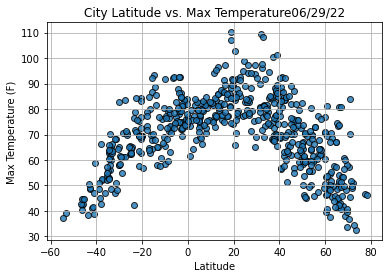

In [16]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

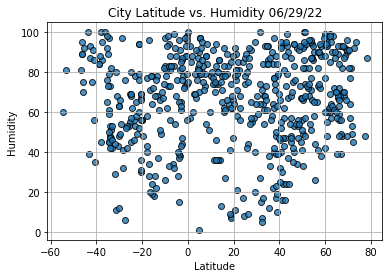

In [17]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black",
           linewidths=1, marker="o", alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))

plt.ylabel("Humidity")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

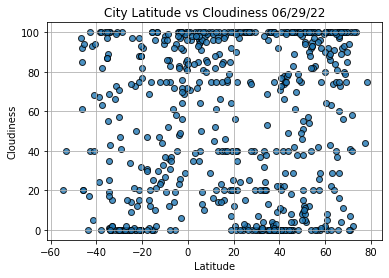

In [18]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black",
           linewidths=1, marker="o", alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness " + time.strftime("%x"))

plt.ylabel("Cloudiness")

plt.xlabel("Latitude")

plt.grid(True)

# Save figure 
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

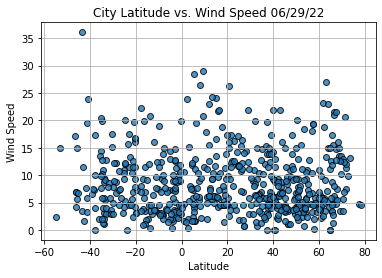

In [19]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black",
           linewidths=1, marker="o", alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))

plt.ylabel("Wind Speed")

plt.xlabel("Latitude")

plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [20]:
# Import linear regression from the SciPy stats module. 
from scipy.stats import linregress

In [21]:
# Create an equal number of latitudes and temperatures.
lats=[42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [22]:
# Perform linear regression
(slope, intercept, r_value, p_value, std_error) = linregress(lats, temps)

# Get the equation of the line
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [23]:
# Calculate the regression line "y values" from the slope and intercept
regress_values=[(lat * slope + intercept) for lat in lats]

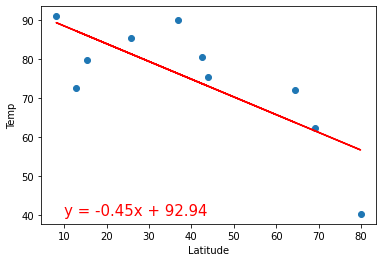

In [24]:
# Create a scatter plot of the x and y values.
plt.scatter(lats, temps)

# Plot the regression line with the x-values and y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"red")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")

plt.xlabel("Latitude")

plt.ylabel("Temp")

plt.show()

In [25]:
"""Create a function to perform linear regression on the weather data
and plot a regression line and the equation with the data"""
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Perform linear regression
    (slope, intercept, r_value, p_value, std_error)=linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values=x_values * slope + intercept

    # Get the equation of the line.
    line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values
    plt.scatter(x_values, y_values)

    # Plot the regression line with the x values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"red")

    # Annotate the text for the line equation and its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")

    plt.title(title)

    plt.xlabel("Latitude")

    plt.ylabel(y_label)

    plt.show()

In [26]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alamosa,US,2022-06-29 17:07:54,37.4695,-105.8700,69.78,40,0,0.00
2,Jamestown,US,2022-06-29 17:04:29,42.0970,-79.2353,74.05,57,100,9.22
3,Zaysan,KZ,2022-06-29 17:07:54,47.4667,84.8667,75.65,34,38,10.96
4,Kutum,SD,2022-06-29 17:07:55,14.2000,24.6667,81.21,36,66,6.06
5,Yellowknife,CA,2022-06-29 17:07:55,62.4560,-114.3525,51.57,57,22,5.86


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>= 0)]

southern_hemi_df=city_data_df.loc[(city_data_df["Lat"])< 0]

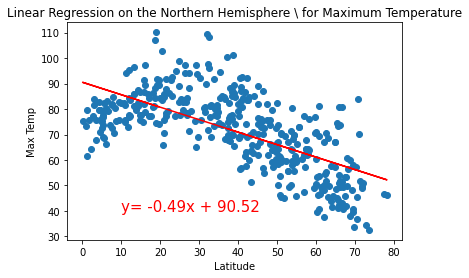

In [28]:
# Linear regression on the Northern Hemisphere
x_values=northern_hemi_df["Lat"]

y_values=northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere \ for Maximum Temperature",
                      "Max Temp", (10,40))

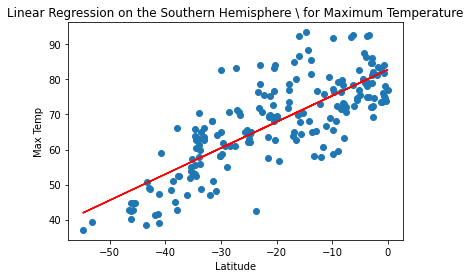

In [29]:
# Linear regression on the Southern Hemisphere
x_values=southern_hemi_df["Lat"]

y_values=southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for Maximum Temperature",
                      "Max Temp", (-50,90))

In [30]:
# Print out line equation and r-value

# Perform linear regression
(slope, intercept, r_value, p_value, std_error) = linregress(southern_hemi_df["Lat"],
                                                             southern_hemi_df["Max Temp"])
# Get the equation of the line
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

print(f"The r-value is: {r_value:.3f}")

y = 0.74x + 82.78
The r-value is: 0.786


In [31]:
# Print out line equation and r-value

# Perform linear regression
(slope, intercept, r_value, p_value, std_error) = linregress(northern_hemi_df["Lat"],
                                                             northern_hemi_df["Max Temp"])
# Get the equation of the line
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

print(f"The r-value is: {r_value:.3f}")

y = -0.49x + 90.52
The r-value is: -0.658


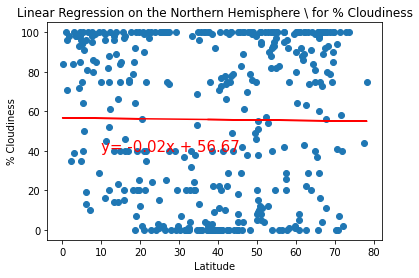

In [42]:
x_values=northern_hemi_df["Lat"]

y_values=northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Cloudiness",
                      "% Cloudiness", (15,60))

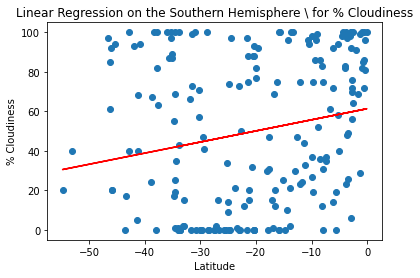

In [39]:
# Linear regression on the Southern Hemisphere
x_values=southern_hemi_df["Lat"]

y_values=southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for % Cloudiness",
                      "% Cloudiness", (-50,60))

In [34]:
# Find r-value

# Perform linear regression
(slope, intercept, r_value, p_value, st_dev)=linregress(southern_hemi_df["Lat"],
                                                       southern_hemi_df["Cloudiness"])

# Get the equation of the line
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: " +str(round(r_value,3)))

print(line_eq)

The r-value is: 0.203
y = 0.56x + 61.32


In [35]:
# Find r-value

# Perform linear regression
(slope, intercept, r_value, p_value, st_dev)=linregress(northern_hemi_df["Lat"],
                                                       northern_hemi_df["Cloudiness"])

# Get the equation of the line
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: " +str(round(r_value,3)))

print(line_eq)

The r-value is: -0.011
y = -0.02x + 56.67


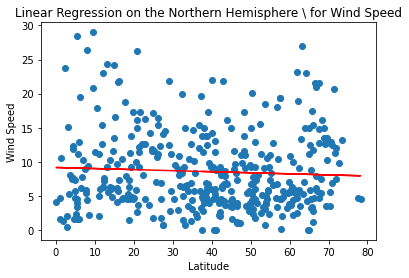

In [38]:
# Linear regression on the Northern Hemisphere
x_values=northern_hemi_df["Lat"]

y_values=northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Wind Speed",
                      "Wind Speed", (40,30))

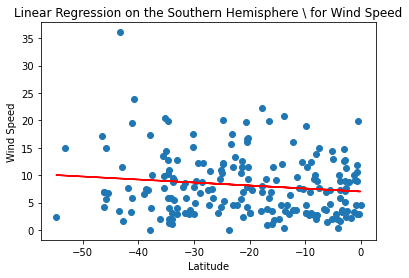

In [37]:
# Linear regression on the Southern Hemisphere
x_values=southern_hemi_df["Lat"]

y_values=southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for Wind Speed",
                      "Wind Speed", (-30,30))